## Problem statement:

Develop a AI based solution to predict the hourly output power of a Combined Cycle Power Plant.

### Abstract

The dataset contains 9568 data points collected from a Combined Cycle Power Plant over 6 years (2006-2011), when the power plant was set to work with full load. Features consist of hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH) and Exhaust Vacuum (V) to predict the net hourly electrical energy output (EP) of the plant.
A combined cycle power plant (CCPP) is composed of gas turbines (GT), steam turbines (ST) and heat recovery steam generators. In a CCPP, the electricity is generated by gas and steam turbines, which are combined in one cycle, and is transferred from one turbine to another. While the Vacuum is collected from and has effect on the Steam Turbine, the other three of the ambient variables effect the GT performance.

Attribute Information:

Features consist of hourly average ambient variables
- Temperature (AT) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg
- Net hourly electrical energy output (PE) 420.26-495.76 MW
The averages are taken from various sensors located around the plant that record the ambient variables every second. 

### Flow chart of this Project

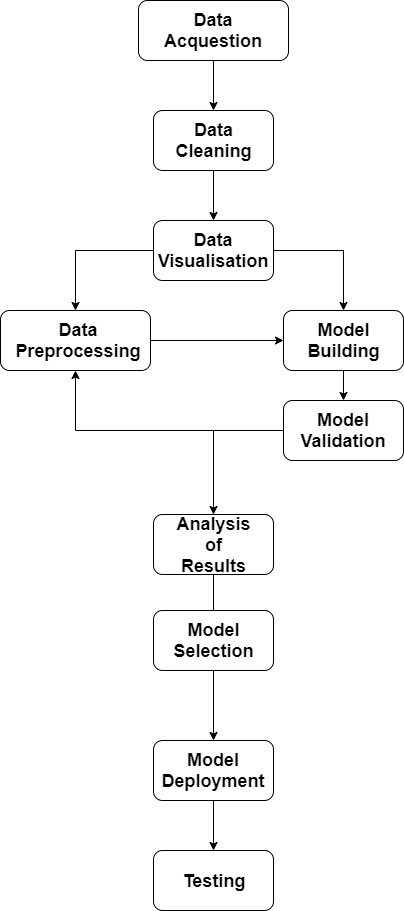

### Data Acquisition

The data is collected from various sensors placed inside the power plant

** This data is taken from UCI (University of California) Machine learning repository http://archive.ics.uci.edu/ml/datasets/Combined%20Cycle%20Power%20Plant





Import all the required libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.linear_model
import sklearn
import sklearn.ensemble
import pickle

Read all the csv files.

In [2]:
data1 = pd.read_csv('data1.csv')
data2= pd.read_csv('data2.csv')
data3 = pd.read_csv('data3.csv')
data4 = pd.read_csv('data4.csv')
data5 = pd.read_csv('data5.csv')

Concatenation of all the files.

In [3]:
data = pd.concat([data1,data2,data3,data4,data5])
data

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


### Data Cleaning

Chech for duplicates.

In [4]:
data.duplicated().sum()

38313

Drop the duplicates.

In [5]:
data = data.drop_duplicates()

Check for null values.

In [6]:
data.isnull().sum().sum()

0

In [7]:
data.shape

(9527, 5)

### Data Visualisation

Graphical representation between the attributes and the target.

Text(0, 0.5, 'Energy Produced')

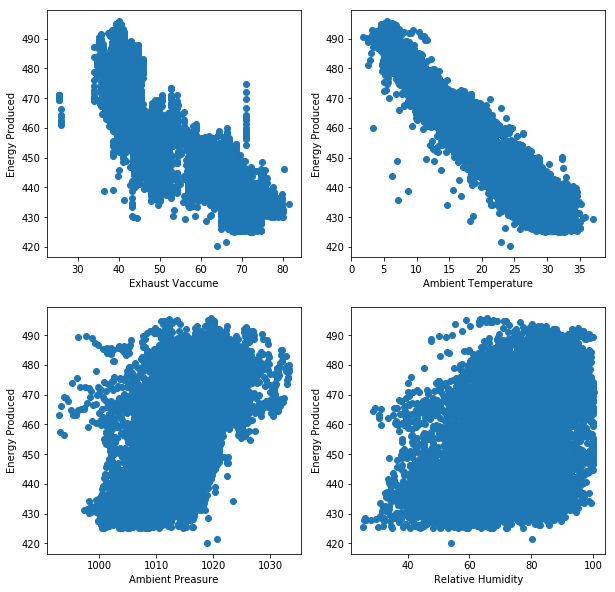

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(data.V, data.PE)
plt.xlabel('Exhaust Vaccume')
plt.ylabel('Energy Produced')
plt.subplot(2,2,2)
plt.scatter(data.AT, data.PE)
plt.xlabel('Ambient Temperature')
plt.ylabel('Energy Produced')
plt.subplot(2,2,3)
plt.scatter(data.AP, data.PE)
plt.xlabel('Ambient Preasure')
plt.ylabel('Energy Produced')
plt.subplot(2,2,4)
plt.scatter(data.RH, data.PE)
plt.xlabel('Relative Humidity')
plt.ylabel('Energy Produced')

Plotting the heat map to understand the correlation in the data.

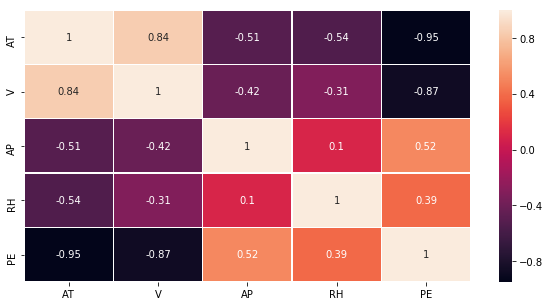

In [9]:
plt.figure(figsize=(10,5))
sn.heatmap(data.corr(),annot=True,linewidth=0.2)

###  Data Preprocessing and Model Building

Splitting dependent and independent features.

In [10]:
X = data.drop('PE',axis=1)
Y = data.PE

Splitting data into train and test sets.

In [11]:
X_train , X_test, Y_train , Y_test = train_test_split(X,Y, test_size = 0.05)

Fitting the linearRegression model to the data.

In [12]:
Lr = LinearRegression().fit(X_train , Y_train)

Predicting the target test values.

In [13]:
y = Lr.predict(X_test)

Check the mean_squared_error between actual test target attribute  and predicted test target attribute.

In [14]:
sklearn.metrics.mean_squared_error(Y_test , Lr.predict(X_test))

18.022333075092984

Check the r2_score between actual test target attribute  and predicted test target attribute.

In [15]:
sklearn.metrics.r2_score(Y_test , Lr.predict(X_test))

0.9371619795019532

#### Apply regularization methods to check for improvement in accuracy. 

Applying Lasso regularisation method and check the r2_score between actual test target attribute  and predicted test target attribute.

In [16]:
Lasso = sklearn.linear_model.Lasso().fit(X_train , Y_train)
sklearn.metrics.r2_score(Y_test , Lasso.predict(X_test))

0.9370314293877962

Applying Ridge regularisation method.

In [17]:
Ridge = sklearn.linear_model.Ridge().fit(X_train , Y_train)
print(sklearn.metrics.r2_score(Y_test , Ridge.predict(X_test)))

0.9371619927556479


#### Feature Scaling

In [18]:
X = X/X.max()

In [19]:
X_train , X_test, Y_train , Y_test = train_test_split(X,Y, test_size = 0.05)
Lr = LinearRegression().fit(X_train , Y_train)
sklearn.metrics.r2_score(Y_test , Lr.predict(X_test))

0.919154949836501

In [20]:
Lasso = sklearn.linear_model.Lasso().fit(X_train , Y_train)
sklearn.metrics.r2_score(Y_test , Lasso.predict(X_test))

0.8069784997847972

In [21]:
Ridge = sklearn.linear_model.Ridge().fit(X_train , Y_train)
sklearn.metrics.r2_score(Y_test , Ridge.predict(X_test))

0.9191689229163418

#### Normalization

In [22]:
X = (X - X.median())/X.std()
X_train , X_test, Y_train , Y_test = train_test_split(X,Y, test_size = 0.05)
Lr = LinearRegression().fit(X_train , Y_train)
sklearn.metrics.r2_score(Y_test , Lr.predict(X_test))

0.8934949234378279

In [23]:
Lasso = sklearn.linear_model.Lasso().fit(X_train , Y_train)
sklearn.metrics.r2_score(Y_test , Lasso.predict(X_test))

0.8827640940453877

In [24]:
Ridge = sklearn.linear_model.Ridge().fit(X_train , Y_train)
sklearn.metrics.r2_score(Y_test , Ridge.predict(X_test))

0.8935143674974577

### Trying Other Algorithms

#### DecisionTreeRegressor 

In [25]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor()  
Dt = regressor.fit(X_train , Y_train)
sklearn.metrics.r2_score(Y_test , Dt.predict(X_test))

0.8982983530022361

#### SGDRegressor

In [26]:
SGD = sklearn.linear_model.SGDRegressor().fit(X_train , Y_train)
sklearn.metrics.r2_score(Y_test , SGD.predict(X_test))

C:\Users\Sumant Hegde\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.8898131818965708

#### Support Vector Regressor

In [27]:
SVR = sklearn.svm.LinearSVR().fit(X_train , Y_train)
sklearn.metrics.r2_score(Y_test , SVR.predict(X_test))

0.8891944484597634

#### Random Forest

In [28]:
RF = sklearn.ensemble.RandomForestRegressor().fit(X_train , Y_train)
sklearn.metrics.r2_score(Y_test , RF.predict(X_test))

C:\Users\Sumant Hegde\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9178927424266329

#### Polynomial Regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures 

poly = PolynomialFeatures(degree = 2) 
X_poly = poly.fit_transform(X) 

poly.fit(X_train, Y_train) 
Poly = LinearRegression().fit(X_train , Y_train)
sklearn.metrics.r2_score(Y_test , Poly.predict(X_test))

0.8934949234378279

#### Results comparision

In [30]:
results = pd.DataFrame({'Regression Models':['Linear_Regression','Lasso','Ridge','LR_with_FeatureScaling','Lasso_with_FeatureScaling','Ridge_with_FeatureScaling','LR_with_Normalization','Lasso_with_Normalization','Ridge_with_Normalization','Decision_Tree_regressor','Stochastic_Gradient_Decent','SupportVectorRegressor','RandomForest','Polynomial_Regressor'],
'r2_score':['0.93730','0.937325','0.93730','0.9276','0.9277','0.9288','0.9254','0.9260',sklearn.metrics.r2_score(Y_test , Ridge.predict(X_test)),sklearn.metrics.r2_score(Y_test , Dt.predict(X_test)),sklearn.metrics.r2_score(Y_test , SGD.predict(X_test)),sklearn.metrics.r2_score(Y_test , SVR.predict(X_test)),sklearn.metrics.r2_score(Y_test , RF.predict(X_test)),sklearn.metrics.r2_score(Y_test , Poly.predict(X_test))]})

In [31]:
results

,Regression Models,r2_score
0,Linear_Regression,0.93730
1,Lasso,0.937325
2,Ridge,0.93730
3,LR_with_FeatureScaling,0.9276
4,Lasso_with_FeatureScaling,0.9277
5,Ridge_with_FeatureScaling,0.9288
6,LR_with_Normalization,0.9254
7,Lasso_with_Normalization,0.9260
8,Ridge_with_Normalization,0.893514
9,Decision_Tree_regressor,0.898298


In [32]:
sklearn.metrics.r2_score(Y_test ,sklearn.ensemble.RandomForestRegressor().fit(X_train[['AT','V']].values.reshape(-1,2) , Y_train).predict(X_test[['AT','V']].values.reshape(-1,2)))

C:\Users\Sumant Hegde\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9120992446405544

In [33]:
Feature_importance = pd.DataFrame({'Feature combination':['AT','V','AP','RH','AT V','AT AP','AT RH','V AP','V RH','AP RH','AT V AP', 'AT AP RH', 'V AP RH','AT V RH', 'ALL Including'],
                                   'R2_Score':
[sklearn.metrics.r2_score(Y_test ,sklearn.ensemble.RandomForestRegressor().fit(X_train['AT'].values.reshape(-1,1) , Y_train).predict(X_test['AT'].values.reshape(-1,1))),
sklearn.metrics.r2_score(Y_test ,sklearn.ensemble.RandomForestRegressor().fit(X_train['V'].values.reshape(-1,1) , Y_train).predict(X_test['V'].values.reshape(-1,1))),
sklearn.metrics.r2_score(Y_test ,sklearn.ensemble.RandomForestRegressor().fit(X_train['AP'].values.reshape(-1,1) , Y_train).predict(X_test['AP'].values.reshape(-1,1))),
sklearn.metrics.r2_score(Y_test ,sklearn.ensemble.RandomForestRegressor().fit(X_train['RH'].values.reshape(-1,1) , Y_train).predict(X_test['RH'].values.reshape(-1,1))),
sklearn.metrics.r2_score(Y_test ,sklearn.ensemble.RandomForestRegressor().fit(X_train[['AT','V']].values.reshape(-1,2) , Y_train).predict(X_test[['AT','V']].values.reshape(-1,2))),
sklearn.metrics.r2_score(Y_test ,sklearn.ensemble.RandomForestRegressor().fit(X_train[['AT','AP']].values.reshape(-1,2) , Y_train).predict(X_test[['AT','AP']].values.reshape(-1,2))),
sklearn.metrics.r2_score(Y_test ,sklearn.ensemble.RandomForestRegressor().fit(X_train[['AT','RH']].values.reshape(-1,2) , Y_train).predict(X_test[['AT','RH']].values.reshape(-1,2))),
sklearn.metrics.r2_score(Y_test ,sklearn.ensemble.RandomForestRegressor().fit(X_train[['V','AP']].values.reshape(-1,2) , Y_train).predict(X_test[['V','AP']].values.reshape(-1,2))),
sklearn.metrics.r2_score(Y_test ,sklearn.ensemble.RandomForestRegressor().fit(X_train[['V','RH']].values.reshape(-1,2) , Y_train).predict(X_test[['V','RH']].values.reshape(-1,2))),
sklearn.metrics.r2_score(Y_test ,sklearn.ensemble.RandomForestRegressor().fit(X_train[['AP','RH']].values.reshape(-1,2) , Y_train).predict(X_test[['AP','RH']].values.reshape(-1,2))),
sklearn.metrics.r2_score(Y_test ,sklearn.ensemble.RandomForestRegressor().fit(X_train[['AT','V' ,'AP']].values.reshape(-1,3) , Y_train).predict(X_test[['AT','V' ,'AP']].values.reshape(-1,3))),
sklearn.metrics.r2_score(Y_test ,sklearn.ensemble.RandomForestRegressor().fit(X_train[['AT','AP','RH']].values.reshape(-1,3) , Y_train).predict(X_test[['AT','AP','RH']].values.reshape(-1,3))),
sklearn.metrics.r2_score(Y_test ,sklearn.ensemble.RandomForestRegressor().fit(X_train[['V','AP','RH']].values.reshape(-1,3) , Y_train).predict(X_test[['V','AP','RH']].values.reshape(-1,3))),
sklearn.metrics.r2_score(Y_test ,sklearn.ensemble.RandomForestRegressor().fit(X_train[['V','AP','RH']].values.reshape(-1,3) , Y_train).predict(X_test[['AT','V' ,'RH']].values.reshape(-1,3))),
sklearn.metrics.r2_score(Y_test ,sklearn.ensemble.RandomForestRegressor().fit(X_train , Y_train).predict(X_test))

]})

C:\Users\Sumant Hegde\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sumant Hegde\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sumant Hegde\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sumant Hegde\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Sumant Hegde\Anaconda3\lib\site-package

In [34]:
Feature_importance

,Feature combination,R2_Score
0,AT,0.841501
1,V,0.869828
2,AP,0.208185
3,RH,-0.189023
4,AT V,0.912461
5,AT AP,0.855895
6,AT RH,0.865997
7,V AP,0.896831
8,V RH,0.882281
9,AP RH,0.386152


#### Save Model

In [35]:
pickle.dump(RF, open('ML_project_RF.pkl', 'wb'))

#### Import the best model

In [36]:
loaded_model = pickle.load(open('ML_project.pkl', 'rb'))
sklearn.metrics.mean_squared_error(Y_test , loaded_model.predict(X_test))

3.682923387840675

#### Inference

- The attributes Ambient Temperature , Ambient Pressure , Exhaust Vacuum directly influence the net hourly electric power output.
- The attribute Relative Humidity has comparitively less impact on net hourly electric power output.

#### Conclusion

- Random Forest Algorithm best fits the data, hence this algorithm can be applied for better prediction of net hourly electric power output.
- Random Forest Algorithm predicts the data with r2_score extremely near to 1, compared to other algorithms.
- For this application there may not be requirement of data from Humidity Sensors, if company is using humidity sensor solely for this purpose, we suggest to remove them.